# Feed Forward Net

Based on **Patric Loeber** video: https://www.youtube.com/watch?v=c36lUUr864M&t=10360s

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [17]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
device = torch.device('cuda')

In [3]:
# hyper parameters
input_size = 784 # iumages size 28x28 -> 1d tensor
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [4]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
    transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
    transform=transforms.ToTensor())

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,
    shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size,
    shuffle=False)

Size of the samples: torch.Size([100, 1, 28, 28]), size of the labels: torch.Size([100])


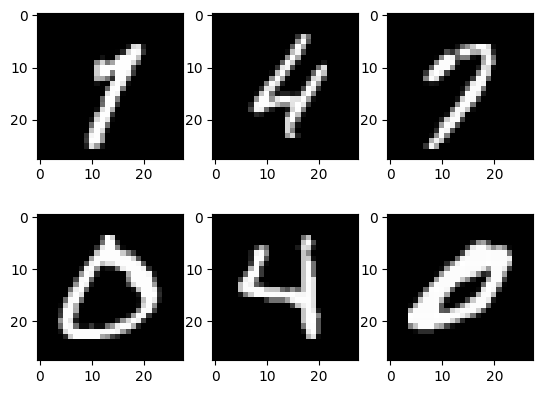

In [6]:
# on batch of data
examples = iter(train_loader)
samples, labels = next(examples)
print(f"Size of the samples: {samples.shape}, size of the labels: {labels.shape}")

for i in range(6):
    plt.subplot(2, 3, i+1) # 2 rows, 3 columns and index i+1
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [7]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        # first layer
        self.l1 = nn.Linear(input_size, hidden_size)
        # activation function
        self.relu = nn.ReLU()
        # another linear layer
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # here at the end we don't want an activation function
        # we don't apply softmax here like usuall in multi-class clasification problem
        # because we will see that we will use the cros entropy loss and this will apply softmax for us
        return out

In [8]:
model = NeuralNet(input_size, hidden_size, num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss() # cross entropy loss will apply softmax for use
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [19]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # we will reshape our images first
        # because if we have a look at the shape we will see that it is 100, 1, 28, 28
        # and our input size is 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # move the model to the same device as the data
        model = model.to(device)
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        # updating parameters for us
        optimizer.step()
        
        # every 100 steps print 
        if (i+1) % 100 == 0:
            print(f"epoch {epoch+1} / {num_epochs}, step {i+1} / {n_total_steps}, loss = {loss.item():.4f}")

epoch 1 / 2, step 100 / 600, loss = 0.3794
epoch 1 / 2, step 200 / 600, loss = 0.3146
epoch 1 / 2, step 300 / 600, loss = 0.3424
epoch 1 / 2, step 400 / 600, loss = 0.3615
epoch 1 / 2, step 500 / 600, loss = 0.2488
epoch 1 / 2, step 600 / 600, loss = 0.1752
epoch 2 / 2, step 100 / 600, loss = 0.1948
epoch 2 / 2, step 200 / 600, loss = 0.2246
epoch 2 / 2, step 300 / 600, loss = 0.1520
epoch 2 / 2, step 400 / 600, loss = 0.2285
epoch 2 / 2, step 500 / 600, loss = 0.0732
epoch 2 / 2, step 600 / 600, loss = 0.1606


In [21]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # value, !index!
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        # for each correct prediction we add 1
        n_correct += (predictions == labels).sum().item()
    acc = 100.0 * n_correct / n_samples
    print(f"accuracy = {acc}")

accuracy = 95.36
